In [2]:
import os
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

mp = pd.read_csv("C:/UB/P/Matching Fund 2024/ChOA/Ant Lion/CSV/MP.csv")
sn = pd.read_csv("C:/UB/P/Matching Fund 2024/ChOA/Ant Lion/CSV/SN.csv")
sh = pd.read_csv("C:/UB/P/Matching Fund 2024/ChOA/Ant Lion/CSV/SH.csv")
sy = pd.read_csv("C:/UB/P/Matching Fund 2024/ChOA/Ant Lion/CSV/SY.csv")
plk = pd.read_csv("C:/UB/P/Matching Fund 2024/ChOA/Ant Lion/CSV/PLK.csv")


def normalize(value, min_old, max_old, min_new, max_new):
    return round(1 + ((value - min_old) / (max_old - min_old)) * (max_new - min_new))

def hitung_total_karbo(individual):
    total_karbo = 0
    for i in range(0, 15, 5):  # Start from 0, end at 15 with a step of 5
        total_karbo += mp['carbo'][round(individual[i])-1] + sn['carbo'][round(individual[i+1])-1] + sh['carbo'][round(individual[i+2])-1] + sy['carbo'][round(individual[i+3])-1] + plk['carbo'][round(individual[i+4])-1]
        # prround(f'Carbo: {mp["carbo"][round(individual[i])-1]} + {sn["carbo"][round(individual[i+1])-1]} + {sh["carbo"][round(individual[i+2])-1]} + {sy["carbo"][round(individual[i+3])-1]} + {plk["carbo"][round(individual[i+4])-1]}')

    return total_karbo

def hitung_total_protein(individual):
    total_protein = 0
    for i in range(0, 15, 5):
        total_protein += mp['protein'][round(individual[i])-1] + sn['protein'][round(individual[i+1])-1] + sh['protein'][round(individual[i+2])-1] + sy['protein'][round(individual[i+3])-1] + plk['protein'][round(individual[i+4])-1]
        # prround(f'Protein: {mp["protein"][round(individual[i])-1]} + {sn["protein"][round(individual[i+1])-1]} + {sh["protein"][round(individual[i+2])-1]} + {sy["protein"][round(individual[i+3])-1]} + {plk["protein"][round(individual[i+4])-1]}')

    return total_protein

def hitung_total_energy(individual):
    total_energy = 0
    for i in range(0, 15, 5):
        total_energy += mp['energy'][round(individual[i])-1] + sn['energy'][round(individual[i+1])-1] + sh['energy'][round(individual[i+2])-1] + sy['energy'][round(individual[i+3])-1] + plk['energy'][round(individual[i+4])-1]
        # prround(f'Energy: {mp["energy"][int(individual[i])-1]} + {sn["energy"][int(individual[i+1])-1]} + {sh["energy"][int(individual[i+2])-1]} + {sy["energy"][int(individual[i+3])-1]} + {plk["energy"][int(individual[i+4])-1]}')

    return total_energy

def hitung_total_lemak(individual):
    total_fat = 0
    for i in range(0, 15, 5):
        total_fat += mp['fat'][round(individual[i])-1] + sn['fat'][round(individual[i+1])-1] + sh['fat'][round(individual[i+2])-1] + sy['fat'][round(individual[i+3])-1] + plk['fat'][round(individual[i+4])-1]
        # prround(f'Fat: {mp["fat"][int(individual[i])-1]} + {sn["fat"][individual[i+1]-1]} + {sh["fat"][int(individual[i+2])-1]} + {sy["fat"][int(individual[i+3])-1]} + {plk["fat"][int(individual[i+4])-1]}')

    return total_fat

def fitness_func(individual):
    kebutuhan_energi = 2249.4046
    kebutuhan_karbo = 377.41069
    kebutuhan_protein = 94.3526725
    kebutuhan_lemak = 64.7834611
    total_karbo = hitung_total_karbo(individual)
    total_energi = hitung_total_energy(individual)
    total_protein = hitung_total_protein(individual)
    total_lemak = hitung_total_lemak(individual)

    penalty_karbo = abs(kebutuhan_karbo - total_karbo)
    penalty_energi = abs(kebutuhan_energi - total_energi)
    penalty_protein = abs(kebutuhan_protein - total_protein)
    penalty_lemak = abs(kebutuhan_lemak - total_lemak)

    total_penalty = penalty_karbo + penalty_energi + penalty_protein + penalty_lemak

    return 1000 / total_penalty  # Adjusted to avoid division by zero

def total_penalty_ok(individual):
    kebutuhan_energi = 2249.4046
    kebutuhan_karbo = 377.41069
    kebutuhan_protein = 94.3526725
    kebutuhan_lemak = 64.7834611
    total_karbo = hitung_total_karbo(individual)
    total_energi = hitung_total_energy(individual)
    total_protein = hitung_total_protein(individual)
    total_lemak = hitung_total_lemak(individual)

    penalty_karbo = abs(kebutuhan_karbo - total_karbo)
    penalty_energi = abs(kebutuhan_energi - total_energi)
    penalty_protein = abs(kebutuhan_protein - total_protein)
    penalty_lemak = abs(kebutuhan_lemak - total_lemak)

    total_penalty = penalty_karbo + penalty_energi + penalty_protein + penalty_lemak

    return total_penalty  # Adjusted to avoid division by zero

# def crossOver(parent1, parent2, point):
#     p1, p2 = list(parent1), list(parent2)
#     for i in range(point, len(p1)):
#         p1[i], p2[i] = p2[i], p1[i]
#     return p1, p2

def crossOver(parent1, parent2, point, cr):
    # random.seed()
    p1, p2 = list(parent1), list(parent2)
    if random.random() < cr:
        for i in range(point, len(p1)):
            p1[i], p2[i] = p2[i], p1[i]
    return p1, p2

def insertion_mutation(individual,mutation_rate):
    if random.random() < mutation_rate:
        # Pilih dua titik dalam individu
        point1 = random.randint(0, len(individual) - 1)
        point2 = random.randint(0, len(individual) - 1)
        # Lakukan mutasi inseri
        individual.insert(point1, individual.pop(point2))
    return individual

def createPopulation(target, besarPopulasi):
    populasi = dict()
    for i in range(besarPopulasi):
        temp = dict()
        gen = [random.randint(1, 100) for _ in range(target)]
        # print(gen)
        temp['gen'] = [normalize(gene, 1, 100, 1, 11) for gene in gen]
        # print(temp['gen'])
        temp['fitness'] = fitness_func(temp['gen'])
        populasi[str(i+1)] = temp
    return populasi

def selection(populasi):
    result1 = dict()
    result2 = dict()
    arryGen = []
    arryFitness = []

    for i in populasi:
        arryFitness.append(float(populasi[i]['fitness']))
        arryGen.append(populasi[i]['gen'])

    indexparent1 = arryFitness.index(max(arryFitness))
    result1['gen'] = arryGen[indexparent1]
    result1['fitness'] = arryFitness[indexparent1]

    arryFitness[indexparent1] = 0.0
    indexparent2 = arryFitness.index(max(arryFitness))
    # if (indexparent1 == indexparent2):
    #     indexparent2 += 1

    result2['gen'] = arryGen[indexparent2]
    result2['fitness'] = arryFitness[indexparent2]

    return result1, result2


def regeneration(children, oldPopulasi):
    newPopulasi = dict()
    templist = []

    for i in range(len(oldPopulasi)):
        temp = []
        temp.append(oldPopulasi[str(i+1)]['gen'])
        temp.append(oldPopulasi[str(i+1)]['fitness'])
        templist.append(temp)

    templist.sort(key=lambda x: x[1])

    for j in range(len(templist)):
        tempd = dict()
        tempd['gen'] = templist[j][0]
        tempd['fitness'] = templist[j][1]
        newPopulasi[str(j+1)] = tempd

    for k in range(len(children)):
        newPopulasi[str(k+1)] = children[k]

    return newPopulasi

def termination(populasi, generasi):
    best, none = selection(populasi)
    # if (generasi == 100):
    #     isLoop = False
        # daftar_makanan(best)
        # print(f'Penalty best = {total_penalty_ok(best["gen"])}')
    # else:
    #     isLoop = True
    return best['gen'], best['fitness']

def logging(populasi, solusi, solusi_fit, generasi):
    os.system('cls' if os.name == 'nt' else 'clear')
    # print("Solusi  :", solusi, "\n")
    # print("Dengan fitness  :", solusi_fit, "\n")
    # print("Generasi:", generasi, "\n")
    # for i in range(len(populasi)):
    #     gen = populasi[str(i+1)]['gen']
    #     fitness = populasi[str(i+1)]['fitness']
        # print("Gen :", gen, "| Fitness :", fitness)

def daftar_makanan(best):
    print("Makan Pagi")
    print(f'Makanan pokok\t = {mp["menu"][best["gen"][0]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best["gen"][1]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best["gen"][2]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best["gen"][3]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best["gen"][4]-1]}')
    print("Makan Siang")
    print(f'Makanan pokok\t = {mp["menu"][best["gen"][5]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best["gen"][6]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best["gen"][7]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best["gen"][8]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best["gen"][9]-1]}')
    print("Makan Malam")
    print(f'Makanan pokok\t = {mp["menu"][best["gen"][10]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best["gen"][11]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best["gen"][12]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best["gen"][13]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best["gen"][14]-1]}')
    
def daftar_makanan2(best):
    print("Makan Pagi")
    print(f'Makanan pokok\t = {mp["menu"][best[0]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[1]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[2]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[3]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[4]-1]}')
    print("Makan Siang")
    print(f'Makanan pokok\t = {mp["menu"][best[5]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[6]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[7]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[8]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[9]-1]}')
    print("Makan Malam")
    print(f'Makanan pokok\t = {mp["menu"][best[10]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[11]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[12]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[13]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[14]-1]}')

Parameter ke- -> 1
1 -> {'1': {'gen': [7, 4, 6, 9, 4, 10, 7, 11, 5, 2, 8, 5, 4, 10, 8], 'fitness': 0.8704326819735217}, '2': {'gen': [2, 3, 5, 2, 5, 5, 4, 3, 2, 5, 9, 9, 6, 9, 2], 'fitness': 1.0516147489575953}, '3': {'gen': [2, 10, 9, 5, 10, 9, 7, 1, 4, 5, 4, 7, 10, 2, 4], 'fitness': 1.318654812734214}, '4': {'gen': [7, 4, 10, 8, 7, 3, 4, 9, 4, 8, 8, 3, 6, 10, 9], 'fitness': 1.7817373321759413}, '5': {'gen': [10, 3, 9, 8, 7, 6, 8, 8, 10, 3, 7, 8, 8, 5, 2], 'fitness': 0.5896421381518919}, '6': {'gen': [6, 11, 8, 3, 1, 6, 1, 9, 10, 6, 7, 9, 8, 4, 3], 'fitness': 0.4557327260460694}, '7': {'gen': [10, 8, 2, 3, 4, 6, 4, 5, 1, 9, 8, 2, 2, 9, 4], 'fitness': 0.5578338181642948}, '8': {'gen': [10, 4, 8, 6, 7, 8, 6, 11, 6, 7, 2, 6, 3, 6, 2], 'fitness': 2.128837426698411}, '9': {'gen': [11, 11, 1, 2, 7, 10, 9, 8, 1, 5, 5, 5, 8, 9, 10], 'fitness': 0.5146684162027573}, '10': {'gen': [8, 7, 2, 5, 3, 7, 4, 2, 9, 2, 1, 3, 3, 2, 3], 'fitness': 1.0363676149826784}}
2 -> {'1': {'gen': [4, 7, 8, 3, 4, 4,

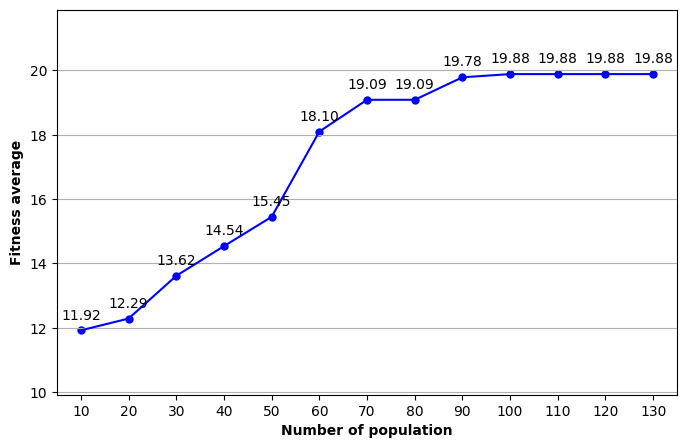

In [6]:
macam_populasi = [10,20,30,40,50,60,70,80,90,100,110,120,130]
num_trials = 10

results = {}
j=1
for value in macam_populasi:
    trial_fitness_results = []
    seed_value = 50
    x=1
    print(f'Parameter ke- -> {j}')
    for _ in range(num_trials):
        mutation_rate = 0.5
        isLoop = True
        generasi = 0
        random.seed(seed_value)
        populasi = createPopulation(15, value)
        print(f'{x} -> {populasi}')
        n=0
        # print(f'{x} -> {populasi}')
        while isLoop:
            # individu terbaik / seleksi
            parent1, parent2 = selection(populasi)
            # cp = round(len(parent1['gen'])/2)  # -> fixed
            seed_value2 = 20 + n
            n=n+1
            random.seed(seed_value2)
            cp = random.randint(1, len(parent1['gen']))  # -> random
            # print(f'{x} -> {cp}')
            child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=0.5)

            # mutasi
            mutasi1 = dict()
            mutasi2 = dict()
            result1 = insertion_mutation(child1, mutation_rate)
            result2 = insertion_mutation(child2, mutation_rate)
            mutasi1['gen'] = result1
            mutasi2['gen'] = result2
            mutasi1['fitness'] = fitness_func(result1)
            mutasi2['fitness'] = fitness_func(result2)

            # calon anggota / regenerasi
            children = [mutasi1, mutasi2]
            populasi = regeneration(children, populasi)
        
        # show
            best, best_fit = termination(populasi, generasi)
            generasi += 1
            if(generasi == 20):
                isLoop=False
            # logging(populasi, best, best_fit, generasi)
        trial_fitness_results.append(best_fit)
        # print(f'{x} -> {best_fit}')
        seed_value = seed_value + 1
        x=x+1
        # print(best_fit)
    j=j+1
    results[value] = sum(trial_fitness_results) / num_trials  # Average fitness

# Plotting the results
color = 'blue'
plt.figure(figsize=(8, 5))
x_values = list(results.keys())
y_values = list(results.values())
plt.scatter(x_values, y_values, s=25, c='blue', label='Data points')

# Initialize previous value for comparison
# previous_value = None
# Label each data point with its corresponding y-value
for i, txt in enumerate(y_values):
    # # Determine the position of the text based on the comparison with the previous value
    # if previous_value is not None:
    #     if txt > previous_value:
    #         xytext = (15, 0)  # Place text below the point if the value is greater
    #     else:
    #         xytext = (0, 10)   # Place text above the point if the value is less or equal
    # else:
    #     xytext = (0, 10)       # Default position for the first point

    plt.annotate(f'{txt:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')
    # previous_value = txt  # Update the previous value
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-5, max(x_values)+5)
plt.xticks(x_values)
plt.plot(x_values, y_values, label='Average Fitness', color=color)
plt.xlabel('Number of population',fontweight='bold')
plt.ylabel('Fitness average',fontweight='bold')
# plt.title('Grafik Rata-Rata fitness Populasi',fontweight='bold')
# plt.legend()
plt.grid(axis='y')
plt.show()

Parametrer ke -> 1
1 -> {'1': {'gen': [7, 4, 6, 9, 4, 10, 7, 11, 5, 2, 8, 5, 4, 10, 8], 'fitness': 0.8704326819735217}, '2': {'gen': [2, 3, 5, 2, 5, 5, 4, 3, 2, 5, 9, 9, 6, 9, 2], 'fitness': 1.0516147489575953}, '3': {'gen': [2, 10, 9, 5, 10, 9, 7, 1, 4, 5, 4, 7, 10, 2, 4], 'fitness': 1.318654812734214}, '4': {'gen': [7, 4, 10, 8, 7, 3, 4, 9, 4, 8, 8, 3, 6, 10, 9], 'fitness': 1.7817373321759413}, '5': {'gen': [10, 3, 9, 8, 7, 6, 8, 8, 10, 3, 7, 8, 8, 5, 2], 'fitness': 0.5896421381518919}, '6': {'gen': [6, 11, 8, 3, 1, 6, 1, 9, 10, 6, 7, 9, 8, 4, 3], 'fitness': 0.4557327260460694}, '7': {'gen': [10, 8, 2, 3, 4, 6, 4, 5, 1, 9, 8, 2, 2, 9, 4], 'fitness': 0.5578338181642948}, '8': {'gen': [10, 4, 8, 6, 7, 8, 6, 11, 6, 7, 2, 6, 3, 6, 2], 'fitness': 2.128837426698411}, '9': {'gen': [11, 11, 1, 2, 7, 10, 9, 8, 1, 5, 5, 5, 8, 9, 10], 'fitness': 0.5146684162027573}, '10': {'gen': [8, 7, 2, 5, 3, 7, 4, 2, 9, 2, 1, 3, 3, 2, 3], 'fitness': 1.0363676149826784}, '11': {'gen': [1, 5, 10, 10, 6, 1, 3,

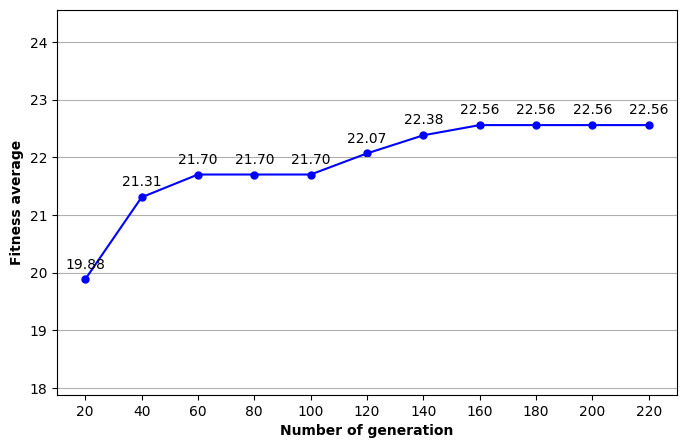

In [22]:
macam_populasi = 100
macam_generasi = [20,40,60,80,100,120,140,160,180,200,220]

num_trials = 10

results = {}
j=1
for value in macam_generasi:
    trial_fitness_results = []
    seed_value = 50
    print(f'Parametrer ke -> {j}')
    x=1
    for _ in range(num_trials):
        mutation_rate = 0.5
        isLoop = True
        generasi = 0
        random.seed(seed_value)
        populasi = createPopulation(15, macam_populasi)
        print(f'{x} -> {populasi}')
        x=x+1
        n=0
        while isLoop:
            # random.seed(seed_value)
            # individu terbaik / seleksi
            parent1, parent2 = selection(populasi)
            # cp = round(len(parent1['gen'])/2)  # -> fixed
            seed_value2 = 20 + n
            n=n+1
            random.seed(seed_value2)
            cp = random.randint(1, len(parent1['gen']))  # -> random
            child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=0.5)

            # mutasi
            mutasi1 = dict()
            mutasi2 = dict()
            result1 = insertion_mutation(child1, mutation_rate)
            result2 = insertion_mutation(child2, mutation_rate)
            mutasi1['gen'] = result1
            mutasi2['gen'] = result2
            mutasi1['fitness'] = fitness_func(result1)
            mutasi2['fitness'] = fitness_func(result2)

            # calon anggota / regenerasi
            children = [mutasi1, mutasi2]
            populasi = regeneration(children, populasi)
        
        # show
            best, best_fit = termination(populasi, generasi)
            generasi += 1
            if(generasi == value):
                isLoop=False
            # logging(populasi, best, best_fit, generasi)
        seed_value = seed_value + 1
        trial_fitness_results.append(best_fit)
    j=j+1
    results[value] = sum(trial_fitness_results) / num_trials  # Average fitness

# Plotting the results
color = 'blue'
plt.figure(figsize=(8, 5))
x_values = list(results.keys())
y_values = list(results.values())
plt.scatter(x_values, y_values, s=25, c='blue')

# Initialize previous value for comparison
# previous_value = None
# Label each data point with its corresponding y-value
for i, txt in enumerate(y_values):
    # # Determine the position of the text based on the comparison with the previous value
    # if previous_value is not None:
    #     if txt > previous_value:
    #         xytext = (15, 0)  # Place text below the point if the value is greater
    #     else:
    #         xytext = (0, 10)   # Place text above the point if the value is less or equal
    # else:
    #     xytext = (0, 10)       # Default position for the first point

    plt.annotate(f'{txt:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,8), ha='center')
    # previous_value = txt  # Update the previous value

plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-10, max(x_values)+10)
plt.xticks(x_values)
plt.plot(x_values, y_values, color=color)
plt.xlabel('Number of generation',fontweight='bold')
plt.ylabel('Fitness average',fontweight='bold')
# plt.title('Grafik Rata-Rata fitness Generasi',fontweight='bold')
# plt.legend()
plt.grid(axis='y')
plt.show()

Parametrer ke -> 1
1 -> {'1': {'gen': [7, 4, 6, 9, 4, 10, 7, 11, 5, 2, 8, 5, 4, 10, 8], 'fitness': 0.8704326819735217}, '2': {'gen': [2, 3, 5, 2, 5, 5, 4, 3, 2, 5, 9, 9, 6, 9, 2], 'fitness': 1.0516147489575953}, '3': {'gen': [2, 10, 9, 5, 10, 9, 7, 1, 4, 5, 4, 7, 10, 2, 4], 'fitness': 1.318654812734214}, '4': {'gen': [7, 4, 10, 8, 7, 3, 4, 9, 4, 8, 8, 3, 6, 10, 9], 'fitness': 1.7817373321759413}, '5': {'gen': [10, 3, 9, 8, 7, 6, 8, 8, 10, 3, 7, 8, 8, 5, 2], 'fitness': 0.5896421381518919}, '6': {'gen': [6, 11, 8, 3, 1, 6, 1, 9, 10, 6, 7, 9, 8, 4, 3], 'fitness': 0.4557327260460694}, '7': {'gen': [10, 8, 2, 3, 4, 6, 4, 5, 1, 9, 8, 2, 2, 9, 4], 'fitness': 0.5578338181642948}, '8': {'gen': [10, 4, 8, 6, 7, 8, 6, 11, 6, 7, 2, 6, 3, 6, 2], 'fitness': 2.128837426698411}, '9': {'gen': [11, 11, 1, 2, 7, 10, 9, 8, 1, 5, 5, 5, 8, 9, 10], 'fitness': 0.5146684162027573}, '10': {'gen': [8, 7, 2, 5, 3, 7, 4, 2, 9, 2, 1, 3, 3, 2, 3], 'fitness': 1.0363676149826784}, '11': {'gen': [1, 5, 10, 10, 6, 1, 3,

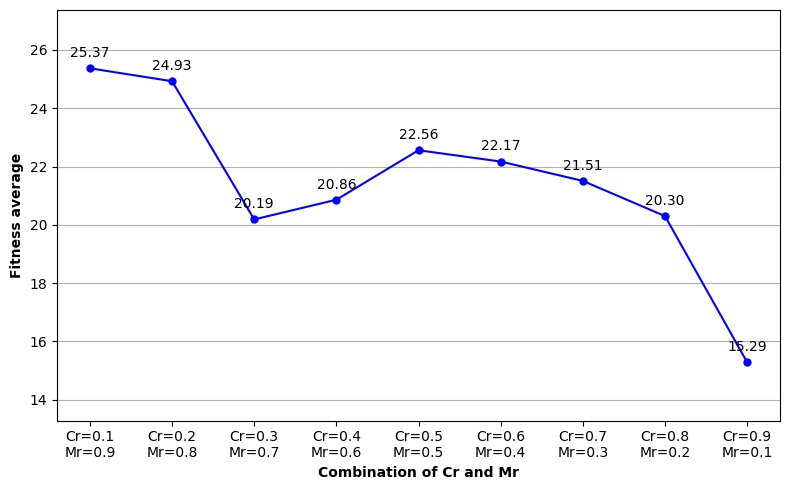

In [8]:
macam_populasi = 100
macam_generasi = 160
macam_kombinasi = [[0.1, 0.9],[0.2, 0.8],[0.3, 0.7],[0.4, 0.6],[0.5, 0.5],[0.6, 0.4],[0.7, 0.3],[0.8, 0.2],[0.9, 0.1]]
num_trials = 10

j=1
results = {}
for idx, value in enumerate(macam_kombinasi):
    trial_fitness_results = []
    seed_value = 50
    print(f'Parametrer ke -> {j}')
    x=1
    for _ in range(num_trials):
        isLoop = True
        generasi = 0
        random.seed(seed_value)
        populasi = createPopulation(15, macam_populasi)
        print(f'{x} -> {populasi}')
        x=x+1
        n=0
        while isLoop:
            # random.seed(seed_value)
            # individu terbaik / seleksi
            parent1, parent2 = selection(populasi)
            # cp = round(len(parent1['gen'])/2)  # -> fixed
            seed_value2 = 20 + n
            n=n+1
            random.seed(seed_value2)
            cp = random.randint(1, len(parent1['gen']))  # -> random
            child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=value[0])

            # mutasi
            mutasi1 = dict()
            mutasi2 = dict()
            result1 = insertion_mutation(child1, value[1])
            result2 = insertion_mutation(child2, value[1])
            mutasi1['gen'] = result1
            mutasi2['gen'] = result2
            mutasi1['fitness'] = fitness_func(result1)
            mutasi2['fitness'] = fitness_func(result2)

            # calon anggota / regenerasi
            children = [mutasi1, mutasi2]
            populasi = regeneration(children, populasi)
        
        # show
            best, best_fit = termination(populasi, generasi)
            generasi += 1
            if generasi == macam_generasi:
                isLoop = False
            # logging(populasi, best, best_fit, generasi)
        seed_value = seed_value + 1
        trial_fitness_results.append(best_fit)
    results[idx] = sum(trial_fitness_results) / num_trials  # Average fitness
    j=j+1


# Plotting the results
plt.figure(figsize=(8, 5))

# Create a list of labels for each combination of Cr and Mr
labels = [f'Cr={cr}\nMr={mr}' for cr, mr in macam_kombinasi]

# Create a list of x-values based on the number of combinations
x_values = range(len(macam_kombinasi))

# Get the average fitness values
y_values = list(results.values())

# Plot each point and label
for i in range(len(x_values)):
    plt.scatter(x_values[i], y_values[i], s=25, c='blue')
    plt.annotate(f'{y_values[i]:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')

# Set the x-ticks to be the labels for each combination of Cr and Mr
plt.xticks(x_values, labels)

# Plot the line
plt.plot(x_values, y_values, color='blue')

# Set the labels and title
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlabel('Combination of Cr and Mr',fontweight='bold')
plt.ylabel('Fitness average',fontweight='bold')
# plt.title('Grafik Rata-Rata Fitness',fontweight='bold')

# Show the grid and plot
plt.grid(axis='y')
plt.tight_layout()  # This will ensure that the labels on the x-axis do not get cut off
plt.show()

In [24]:
import time


macam_populasi = 100
macam_generasi = 160
macam_kombinasi = [0.4,0.6]
num_trials = 10

seed_value = 50
x=1

# List untuk menyimpan hasil best fit dan generasi keberadaannya
best_fit_results = []

for _ in range(num_trials):
    isLoop = True
    generasi = 0
    random.seed(seed_value)
        # random.seed(seed_value)
    # start_time = time.time()  # Waktu mulai eksekusi
    populasi = createPopulation(15, macam_populasi)
    print(f'{x} -> {populasi}')
    x=x+1
    n=0
    while isLoop:
        # random.seed(seed_value)
        # individu terbaik / seleksi
        parent1, parent2 = selection(populasi)
        # cp = round(len(parent1['gen'])/2)  # -> fixed
        seed_value2 = 20 + n
        n=n+1
        random.seed(seed_value2)
        cp = random.randint(1, len(parent1['gen']))  # -> random
        child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=macam_kombinasi[0])

        # mutasi
        mutasi1 = dict()
        mutasi2 = dict()
        result1 = insertion_mutation(child1, macam_kombinasi[1])
        result2 = insertion_mutation(child2, macam_kombinasi[1])
        mutasi1['gen'] = result1
        mutasi2['gen'] = result2
        mutasi1['fitness'] = fitness_func(result1)
        mutasi2['fitness'] = fitness_func(result2)

        # calon anggota / regenerasi
        children = [mutasi1, mutasi2]
        populasi = regeneration(children, populasi)
        
        # show
        best, best_fit = termination(populasi, generasi)
        generasi += 1
        if generasi == macam_generasi:
            isLoop = False
        # logging(populasi, best, best_fit, generasi)
    # Menyimpan best fit dan generasi keberadaannya
        best_fit_results.append((best_fit, generasi))
    # end_time = time.time()  # Waktu selesai eksekusi
    # execution_time = end_time - start_time
    # print(f"Waktu eksekusi percobaan {_ + 1}: {execution_time} detik")
    seed_value = seed_value + 1
    
# Mencetak hasil best fit dan generasi keberadaannya
for i, (fit, gen) in enumerate(best_fit_results):
    print(f"Percobaan {i+1}: Best fit {fit} muncul pada generasi {gen}")

# # Plotting the results
# plt.figure(figsize=(8, 5))

# # Create a list of labels for each combination of Cr and Mr
# labels = [f'Cr={cr}\nMr={mr}' for cr, mr in macam_kombinasi]

# # Create a list of x-values based on the number of combinations
# x_values = range(len(macam_kombinasi))

# # Get the average fitness values
# y_values = list(results.values())

# # Plot each point and label
# for i in range(len(x_values)):
#     plt.scatter(x_values[i], y_values[i], s=25, c='blue')
#     plt.annotate(f'{y_values[i]:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')

# Set the x-ticks to be the labels for each combination of Cr and Mr
# plt.xticks(x_values, labels)

# # Plot the line
# plt.plot(x_values, y_values, color='blue')

# # Set the labels and title
# plt.ylim(min(y_values)-2, max(y_values)+2)
# plt.xlabel('Kombinasi Cr dan Mr',fontweight='bold')
# plt.ylabel('Rata-Rata Fitness',fontweight='bold')
# plt.title('Grafik Rata-Rata Fitness',fontweight='bold')

# # Show the grid and plot
# plt.grid(axis='y')
# plt.tight_layout()  # This will ensure that the labels on the x-axis do not get cut off
# plt.show()

1 -> {'1': {'gen': [6, 11, 6, 2, 4, 8, 7, 6, 5, 7, 6, 8, 4, 7, 3], 'fitness': 1.177003010947663}, '2': {'gen': [5, 3, 11, 2, 9, 4, 8, 10, 9, 3, 5, 2, 10, 2, 10], 'fitness': 1.2157927937686124}, '3': {'gen': [5, 7, 8, 2, 6, 7, 5, 9, 9, 4, 8, 7, 7, 8, 4], 'fitness': 0.8134521715328766}, '4': {'gen': [2, 8, 1, 2, 10, 6, 10, 10, 9, 1, 9, 7, 5, 4, 10], 'fitness': 0.5930183089627911}, '5': {'gen': [5, 10, 2, 3, 8, 4, 4, 3, 8, 7, 2, 2, 5, 8, 7], 'fitness': 1.5382723158206262}, '6': {'gen': [2, 5, 8, 5, 10, 3, 8, 5, 8, 4, 9, 8, 9, 5, 7], 'fitness': 2.6589809962559046}, '7': {'gen': [2, 9, 6, 5, 8, 4, 5, 3, 3, 3, 1, 9, 9, 4, 7], 'fitness': 7.9367045526157955}, '8': {'gen': [2, 2, 10, 11, 3, 3, 1, 2, 10, 8, 10, 6, 10, 8, 5], 'fitness': 1.8180644750116857}, '9': {'gen': [8, 4, 4, 10, 9, 6, 8, 5, 7, 7, 9, 9, 10, 6, 2], 'fitness': 1.1218829621169728}, '10': {'gen': [5, 9, 2, 7, 9, 9, 5, 3, 4, 1, 10, 4, 2, 10, 4], 'fitness': 1.1026993545832084}, '11': {'gen': [6, 3, 5, 6, 2, 2, 3, 10, 4, 2, 8, 9, 8,

In [4]:
import time


macam_populasi = 100
macam_generasi = 160
macam_kombinasi = [0.1,0.9]
num_trials = 5

# seed_value = 0
# x=5

# List untuk menyimpan hasil best fit dan generasi keberadaannya
best_fit_results = []

for _ in range(num_trials):
    isLoop = True
    generasi = 0
    # random.seed(seed_value)
    start_time = time.time()  # Waktu mulai eksekusi
    populasi = createPopulation(15, macam_populasi)
    # print(f'{x} -> {populasi}')
    # x=x+1
    # n=0
    while isLoop:
        # random.seed(seed_value)
        # individu terbaik / seleksi
        parent1, parent2 = selection(populasi)
        # cp = round(len(parent1['gen'])/2)  # -> fixed
        # seed_value2 = 20 + n
        # n=n+1
        # random.seed(seed_value2)
        cp = random.randint(1, len(parent1['gen']))  # -> random
        child1, child2 = crossOver(parent1['gen'], parent2['gen'], cp, cr=macam_kombinasi[0])

        # mutasi
        mutasi1 = dict()
        mutasi2 = dict()
        result1 = insertion_mutation(child1, macam_kombinasi[1])
        result2 = insertion_mutation(child2, macam_kombinasi[1])
        mutasi1['gen'] = result1
        mutasi2['gen'] = result2
        mutasi1['fitness'] = fitness_func(result1)
        mutasi2['fitness'] = fitness_func(result2)

        # calon anggota / regenerasi
        children = [mutasi1, mutasi2]
        populasi = regeneration(children, populasi)
        
        # show
        best, best_fit = termination(populasi, generasi)
        generasi += 1
        if generasi == macam_generasi:
            isLoop = False
        # logging(populasi, best, best_fit, generasi)
    # Menyimpan best fit dan generasi keberadaannya
    # seed_value = seed_value + 1
    end_time = time.time()  # Waktu selesai eksekusi
    execution_time = end_time - start_time
    print(f"Waktu eksekusi percobaan {_ + 1}: {execution_time} detik")
    best_fit_results.append((best_fit, best))
# Mencetak hasil best fit dan generasi keberadaannya
for i, (fit, best) in enumerate(best_fit_results):
    print(f"Percobaan {i+1}: Best fit {fit} dengan susunan {best}")
    daftar_makanan2(best)


Waktu eksekusi percobaan 1: 0.3445870876312256 detik
Waktu eksekusi percobaan 2: 0.3261373043060303 detik
Waktu eksekusi percobaan 3: 0.34987568855285645 detik
Waktu eksekusi percobaan 4: 0.33823680877685547 detik
Waktu eksekusi percobaan 5: 0.3134298324584961 detik
Percobaan 1: Best fit 21.45820355233005 dengan susunan [3, 8, 3, 5, 5, 8, 3, 6, 7, 2, 6, 1, 6, 2, 11]
Makan Pagi
Makanan pokok	 = Nasi Tim
Sumber Nabati	 = Kacang Tanah Rebus
Sumber Hewani	 = Bandeng Goreng
Sayuran		 = Sayur asem
Pelengkap	 = Arbai
Makan Siang
Makanan pokok	 = Kentang rebus
Sumber Nabati	 = Tahu Goreng
Sumber Hewani	 = Gurame Asam Manis
Sayuran		 = Sayur Sop
Pelengkap	 = Alpukat
Makan Malam
Makanan pokok	 = Bihun
Sumber Nabati	 = Kembang Tahu Rebus
Sumber Hewani	 = Gurame Asam Manis
Sayuran		 = Toge Goreng
Pelengkap	 = Kesemek
Percobaan 2: Best fit 68.27393244045838 dengan susunan [3, 7, 1, 5, 8, 2, 6, 4, 9, 6, 4, 7, 6, 8, 8]
Makan Pagi
Makanan pokok	 = Nasi Tim
Sumber Nabati	 = Oncom
Sumber Hewani	 = Ayam 